# $\mathcal{G}_{\phi, \psi}$  2D 

```python
""" MEDCNN 2D training pipeline (Completely local)
    
    MEDCNN: Multiresolution Encoder-Decoder Convolutional Neural Network
    Copyright (C) 2025 Kishore Kumar Tarafdar
    
    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.
"""
```



In [1]:
pwd

'/data1/kishoretarafdar/FILESHARE/MEDCNN.pypi/DemoTrainingPipeline'

In [2]:
!python --version

Python 3.12.7


GPU availability?

In [3]:
import tensorflow as tf
print(f"TensorFlow version {tf.__version__}")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
len(gpus)

2025-04-04 21:32:32.327304: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743782552.348697 3943056 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743782552.355310 3943056 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-04 21:32:32.378895: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version 2.18.0
Num GPUs Available:  3


3

Select one GPU

        Restrict code to use a particular GPU...

In [4]:
# # include ../dirx 
mylibpath = [
    '/data1/kishoretarafdar/FILESHARE/MEDCNN.pypi/MEDCNN/utils',
    '/data1/kishoretarafdar/FILESHARE/MEDCNN.pypi/MEDCNN/models'
    ]
import sys
[sys.path.insert(0,_) for _ in mylibpath]
del mylibpath

from tf_select_a_gpu import select_a_gpu

In [5]:
# select_gpu = gpus[gpu_id]
memory_limit = 12 #GB
select_a_gpu(gpus, gpu_id = 2, memory_limit=memory_limit)
# del gpu_id, select_a_gpu, select_gpu

3 Physical GPUs available 
Selected 1 Logical GPU with 12 GB memory limit


I0000 00:00:1743782554.564271 3943056 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 12288 MB memory:  -> device: 2, name: NVIDIA RTX A6000, pci bus id: 0000:41:00.0, compute capability: 8.6


In [6]:
# !nvidia-smi

In [7]:
49140//1024

47

In [8]:
# !python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

In [9]:
# pip install tqdm
# pip install scikit-learn
# pip install scikit-image
# pip install nibabel
# pip install matplotlib

In [10]:
import keras
from tensorflow.keras.layers import Concatenate
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from IPython import display
from keras.utils import plot_model 
import time



        load attention and DWT modules..

In [11]:
# # # include ../dirx 
# mylibpath = [
#     # '/home/kishor/src/FastDWTConvLayers',
#     # '/home/kishor/src/MRSegmentation/Attentions19102023'
#       # '/home/k/src/_MEDCNNsrc_part/MEDCNN_copy'
#       '/home/kishoretarafdar/src/MEDCNN_copy'
      
#     #'/home/k/PLAYGROUND10GB/SKULSTRIPpaper__'
#     ]
# import sys
# [sys.path.insert(0,_) for _ in mylibpath]
# del mylibpath

from utils import elapsedtime, timestamp
from BoundaryAwareDiceLoss import BoundaryAwareDiceLoss
# from dice import dice_coef
from Load2Ddata import load_ibsr_XY
from TTViterators import get_train_test_val_iterators

# # from DWTIDWT2Dtfv1 import DWT2D, IDWT2D
# from TFDWT3D.DWTIDWT2Dtfv1 import DWT2D, IDWT2D
# from DWTselfAttention2D import DWTselfAttention
# from tensorflow.keras.layers import Concatenate



In [12]:
# ls /home/kishoretarafdar/

In [13]:
start_time=time.time()

# Time elapsed
end_time = time.time()
print(elapsedtime(start_time, end_time))
del start_time, end_time

Elapsed time: mm:ss:mss 	 00:00:000
00:00:000


In [14]:
timestamp(time.time())

2025-04-04 21:32:35.521228


'20250404'

In [15]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

IoU as loss (approx.)  $IoU'=\frac{|T*P|}{|T+P-(T*P)|}=\frac{I}{U}$

$Dice=\frac{2*Intersection}{Union+Intersection}$

Boundary aware dice loss



---

# Data loader

## Option 3 Load complete IBSR

Actual training data

In [16]:
pwd

'/data1/kishoretarafdar/FILESHARE/MEDCNN.pypi/DemoTrainingPipeline'

In [17]:
ls /data1/kishoretarafdar/FILESHARE/IBSR_cookedXY_allplanes/IBSR_XY_skullstripping

IBSR_X.npy*  IBSR_Y.npy*


In [18]:
datapath = '/data1/kishoretarafdar/FILESHARE/IBSR_cookedXY_allplanes/IBSR_XY_skullstripping'
X, Y, dataset = load_ibsr_XY(datapath)
X.shape, Y.shape, dataset

((7056, 256, 256, 1), (7056, 256, 256, 1), 'IBSR')

In [19]:
# X, Y = X[0:88,...], Y[0:88,...]

In [20]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

## Train Test split

In [21]:
# from TTViterators import get_train_test_val_iterators
train_iterator, test_iterator, val_iterator = get_train_test_val_iterators(X,Y)

True (5644, 256, 256, 1)
(5644, 256, 256, 1) (5644, 256, 256, 1) float32 float32 <class 'numpy.ndarray'> <class 'numpy.ndarray'> (1412, 256, 256, 1) (1412, 256, 256, 1) float32 float32 <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Train  True (5079, 256, 256, 1) True float32
Val    True (565, 256, 256, 1) True float32
Test.  True (1412, 256, 256, 1) True float32


In [22]:
# # Normalization (assumned inside model)
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(...)
# datagen.fit(X_train)

In [23]:
# batch_size = 20
# train_iterator = datagen.flow(X_train, Y_train, batch_size=batch_size)
# val_iterator = datagen.flow(X_val, Y_val, batch_size=batch_size)
# test_iterator = datagen.flow(X_test, Y_test, batch_size=batch_size)

In [24]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
# next(train_iterator).shape

# Load and compile model

In [25]:
from G2DwithoutAttention import Gφψ, configs

In [27]:
cd ../traininglogs

/data1/kishoretarafdar/FILESHARE/MEDCNN.pypi/traininglogs


In [28]:
ls -lart

total 47852
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar  1279462 Apr  4 17:32  20250404G_IBSR_nonResidual_bce_config3456.keras
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       55 Apr  4 17:33  G3456.dir
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar     5576 Apr  4 17:33  G3456.dat
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       55 Apr  4 17:33  G3456.bak
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar 23471783 Apr  4 18:57  20250404G_IBSR_nonResidual_bce_config4567.keras
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       52 Apr  4 18:59  G4567.dir
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar     3124 Apr  4 18:59  G4567.dat
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       52 Apr  4 18:59  G4567.bak
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar   699161 Apr  4 19:27  20250404G_IBSR_nonResidual_bce_configminimal2.keras
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       52 Apr  4 19:30  Gminimal2.dir
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar     3124 Apr  4 19:30  Gminimal2.dat
-rw-

In [ ]:
# from model import GφψIDWT, configs
# from modelAPS import Unet2DAPDS, configs
# from modelAPS import GφψAPS, configs

In [29]:
from dice import dice_coef
from compile1 import compile_model

In [30]:
CONFIGKEY= '4567'
CONFIGKEY= '3456'
CONFIGKEY= 'minimal2'
model, segconfig = Gφψ(config=configs[CONFIGKEY], compile=False), 'nonResidual' 
# model, segconfig = Gφψ(config=configs[CONFIGKEY], compile=False), 'nonResidual' 
model, lossname = compile_model(model, dataset, dice_coef)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 256, 256,  │          0 │ input_layer[0][0] │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dwt2d (DWT2D)       │ (None, 128, 128,  │          0 │ lambda[0][0]      │
│                     │ 4)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 128, 128,  │          0 │ dwt2d[0][0]       │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │         20 │ get_item[0][0]    │
│                     │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128, 128,  │          0 │ conv2d[0][0]      │
│                     │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │         38 │ dropout[0][0]     │
│                     │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │          8 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dwt2d_1 (DWT2D)     │ (None, 64, 64, 4) │          0 │ get_item[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pooling (Pooling)   │ (None, 64, 64, 2) │          0 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 64, 64, 1) │          0 │ dwt2d_1[0][0]     │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64, 64, 3) │          0 │ pooling[0][0],    │
│ (Concatenate)       │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64, 4) │        112 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64, 64, 4) │          0 │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64, 4) │        148 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64, 4) │         16 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 64, 64, 4) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 31,335 (122.40 KB)

 Trainable params: 31,151 (121.68 KB)

 Non-trainable params: 184 (736.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

# Train one model

In [31]:
pwd

'/data1/kishoretarafdar/FILESHARE/MEDCNN.pypi/traininglogs'

In [32]:
ls -lart

total 47852
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar  1279462 Apr  4 17:32  20250404G_IBSR_nonResidual_bce_config3456.keras
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       55 Apr  4 17:33  G3456.dir
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar     5576 Apr  4 17:33  G3456.dat
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       55 Apr  4 17:33  G3456.bak
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar 23471783 Apr  4 18:57  20250404G_IBSR_nonResidual_bce_config4567.keras
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       52 Apr  4 18:59  G4567.dir
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar     3124 Apr  4 18:59  G4567.dat
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       52 Apr  4 18:59  G4567.bak
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar   699161 Apr  4 19:27  20250404G_IBSR_nonResidual_bce_configminimal2.keras
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar       52 Apr  4 19:30  Gminimal2.dir
-rw-rw-r-- 1 kishoretarafdar kishoretarafdar     3124 Apr  4 19:30  Gminimal2.dat
-rw-

In [33]:
dataset, lossname, segconfig, CONFIGKEY

('IBSR', 'bce', 'nonResidual', 'minimal2')

In [ ]:
break

2025-04-04 21:33:55.740631
Epoch 1/40


/data1/kishoretarafdar/miniforge3/envs/tf218/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/data1/kishoretarafdar/miniforge3/envs/tf218/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(
E0000 00:00:1743782644.258476 3943056 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1743782646.532245 3943397 cuda_dnn.cc:529] Loade

254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - IoU: 0.5502 - accuracy: 0.7098 - dice_coef: 0.6118 - loss: 0.5819
Epoch 1: val_loss improved from inf to 0.33400, saving model to 20250404G_IBSR_nonResidual_bce_configminimal2.keras
254/254 ━━━━━━━━━━━━━━━━━━━━ 34s 83ms/step - IoU: 0.5504 - accuracy: 0.7099 - dice_coef: 0.6121 - loss: 0.5815 - val_IoU: 0.7534 - val_accuracy: 0.8594 - val_dice_coef: 0.7985 - val_loss: 0.3340
Epoch 2/40
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - IoU: 0.8990 - accuracy: 0.9468 - dice_coef: 0.8310 - loss: 0.2775
Epoch 2: val_loss improved from 0.33400 to 0.26309, saving model to 20250404G_IBSR_nonResidual_bce_configminimal2.keras
254/254 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - IoU: 0.8990 - accuracy: 0.9468 - dice_coef: 0.8310 - loss: 0.2774 - val_IoU: 0.8995 - val_accuracy: 0.9471 - val_dice_coef: 0.8525 - val_loss: 0.2631
Epoch 3/40
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - IoU: 0.9213 - accuracy: 0.9590 - dice_coef: 0.8726 - loss: 0.2156
Epoch 3: val_loss impr

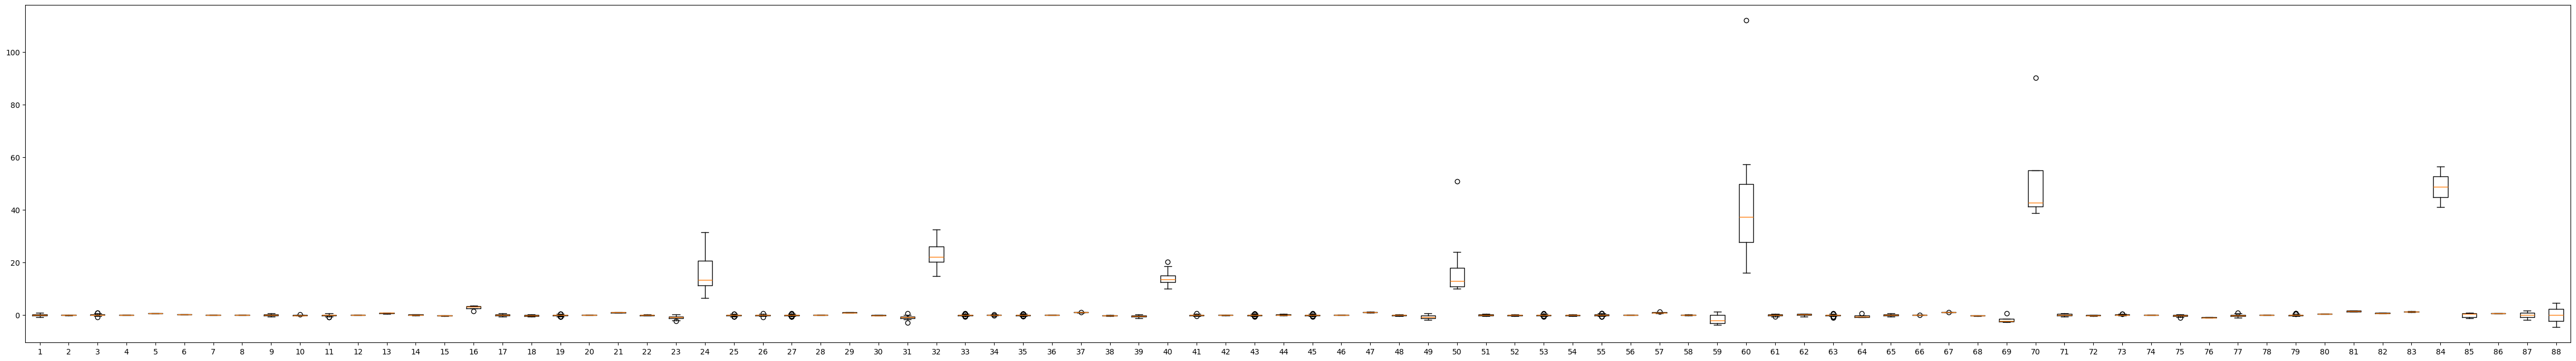

Elapsed time: mm:ss:mss 	 12:06:957


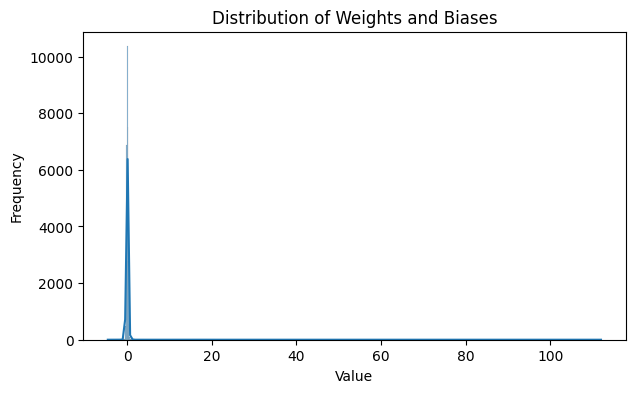

In [34]:
from Train1 import train
epochs = 40
train(model, train_iterator, test_iterator, val_iterator, dataset=dataset, segconfig=segconfig , lossname=lossname, CONFIGKEY=CONFIGKEY, epochs=epochs)


# Assuming `model` is your trained U-Net model
model_weights = model.get_weights()
all_weights = np.concatenate([w.flatten() for w in model_weights])
import seaborn as sns

# Plotting the histogram
plt.figure(figsize=(7, 4))
sns.histplot(all_weights, bins=900, kde=True)
plt.title('Distribution of Weights and Biases')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [35]:
model_weights = model.get_weights()
[_.shape for _ in model_weights]
[_.dtype for _ in model_weights]

[dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('floa

In [36]:
a = [_ for _ in model_weights if len(_.shape)>1 and _.shape[0]>1]
[_.shape for _ in a]

[(3, 3, 1, 2),
 (3, 3, 2, 2),
 (3, 3, 3, 4),
 (3, 3, 4, 4),
 (3, 3, 5, 8),
 (3, 3, 8, 8),
 (3, 3, 9, 16),
 (3, 3, 16, 16),
 (3, 3, 16, 32),
 (3, 3, 32, 32),
 (2, 2, 16, 32),
 (3, 3, 32, 16),
 (3, 3, 16, 16),
 (2, 2, 8, 16),
 (3, 3, 16, 8),
 (3, 3, 8, 8),
 (2, 2, 4, 8),
 (3, 3, 8, 4),
 (3, 3, 4, 4),
 (2, 2, 2, 4),
 (3, 3, 12, 1),
 (3, 3, 4, 2),
 (3, 3, 2, 2),
 (3, 3, 5, 1),
 (3, 3, 3, 1)]

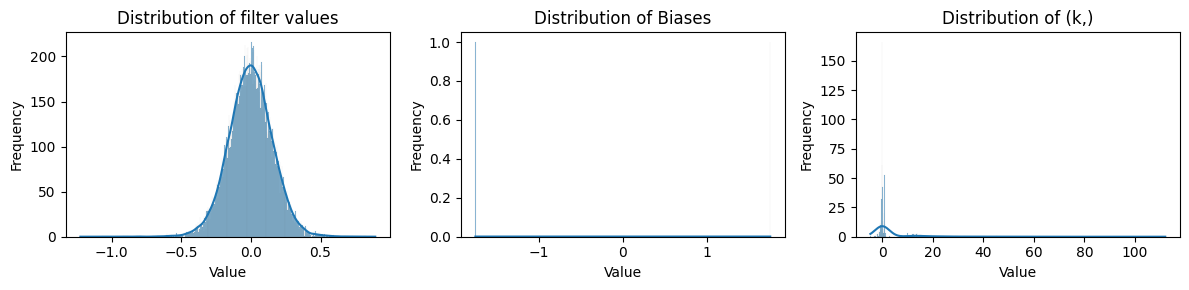

In [37]:
# Assuming `model` is your trained U-Net model
model_weights = model.get_weights()
# a = [_ for _ in model_weights if len(_.shape)>1]
a = [_ for _ in model_weights if len(_.shape)>1 and _.shape[0]>1]
b = [_ for _ in model_weights if len(_.shape)>1 and _.shape[0]==1]
c = [_ for _ in model_weights if len(_.shape)==1]
c
# all_weights = np.concatenate([w.flatten() for w in model_weights])
# all_weights.shape


# Assuming `model` is your trained U-Net model
# model_weights = model.get_weights()
# all_weights = np.concatenate([w.flatten() for w in model_weights])
all_filter_vals = np.concatenate([w.flatten() for w in a])
all_bias1 = np.concatenate([w.flatten() for w in b])
all_bias2 = np.concatenate([w.flatten() for w in c])
import seaborn as sns

# Plotting the histogram
plt.figure(figsize=(12, 3))
plt.subplot(131)
sns.histplot(all_filter_vals, bins=900, kde=True)
plt.title('Distribution of filter values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.subplot(132)
sns.histplot(all_bias1, bins=900, kde=True)
plt.title('Distribution of Biases')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.subplot(133)
sns.histplot(all_bias2, bins=900, kde=True)
plt.title('Distribution of (k,)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [38]:
model_weights[2].shape

(3, 3, 2, 2)

In [39]:
model.weights[0][:,:,0,0]

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.52855325,  0.09927445,  0.7477695 ],
       [ 0.13966972,  0.11394415, -0.55218256],
       [-0.05397076, -0.44330174,  0.24738055]], dtype=float32)>

In [40]:
a[6].shape

(3, 3, 9, 16)

In [41]:
import math

def next_perfect_square(n):
    root = math.ceil(math.sqrt(n))
    return root ** 2

# Given number
# n = 65

# Find the next perfect square
# next_square = next_perfect_square(n)
# next_square

In [42]:
[_.shape for _ in a]

[(3, 3, 1, 2),
 (3, 3, 2, 2),
 (3, 3, 3, 4),
 (3, 3, 4, 4),
 (3, 3, 5, 8),
 (3, 3, 8, 8),
 (3, 3, 9, 16),
 (3, 3, 16, 16),
 (3, 3, 16, 32),
 (3, 3, 32, 32),
 (2, 2, 16, 32),
 (3, 3, 32, 16),
 (3, 3, 16, 16),
 (2, 2, 8, 16),
 (3, 3, 16, 8),
 (3, 3, 8, 8),
 (2, 2, 4, 8),
 (3, 3, 8, 4),
 (3, 3, 4, 4),
 (2, 2, 2, 4),
 (3, 3, 12, 1),
 (3, 3, 4, 2),
 (3, 3, 2, 2),
 (3, 3, 5, 1),
 (3, 3, 3, 1)]

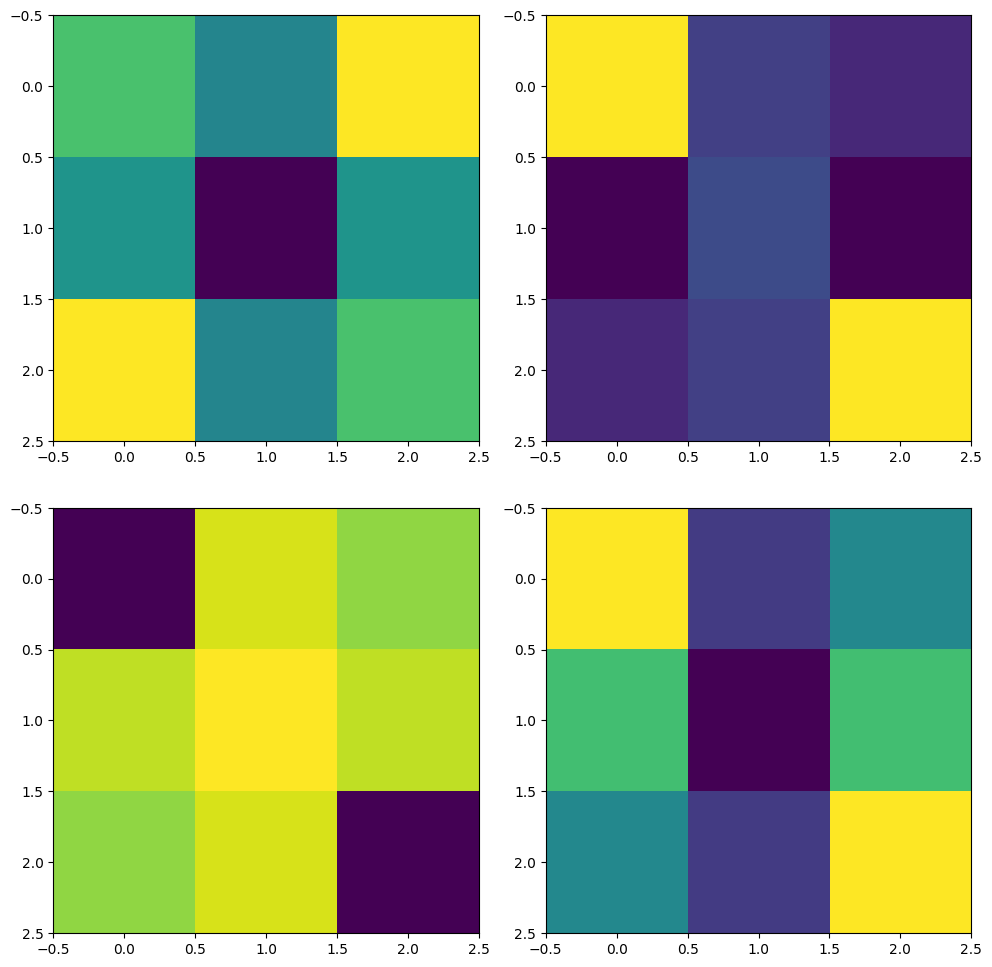

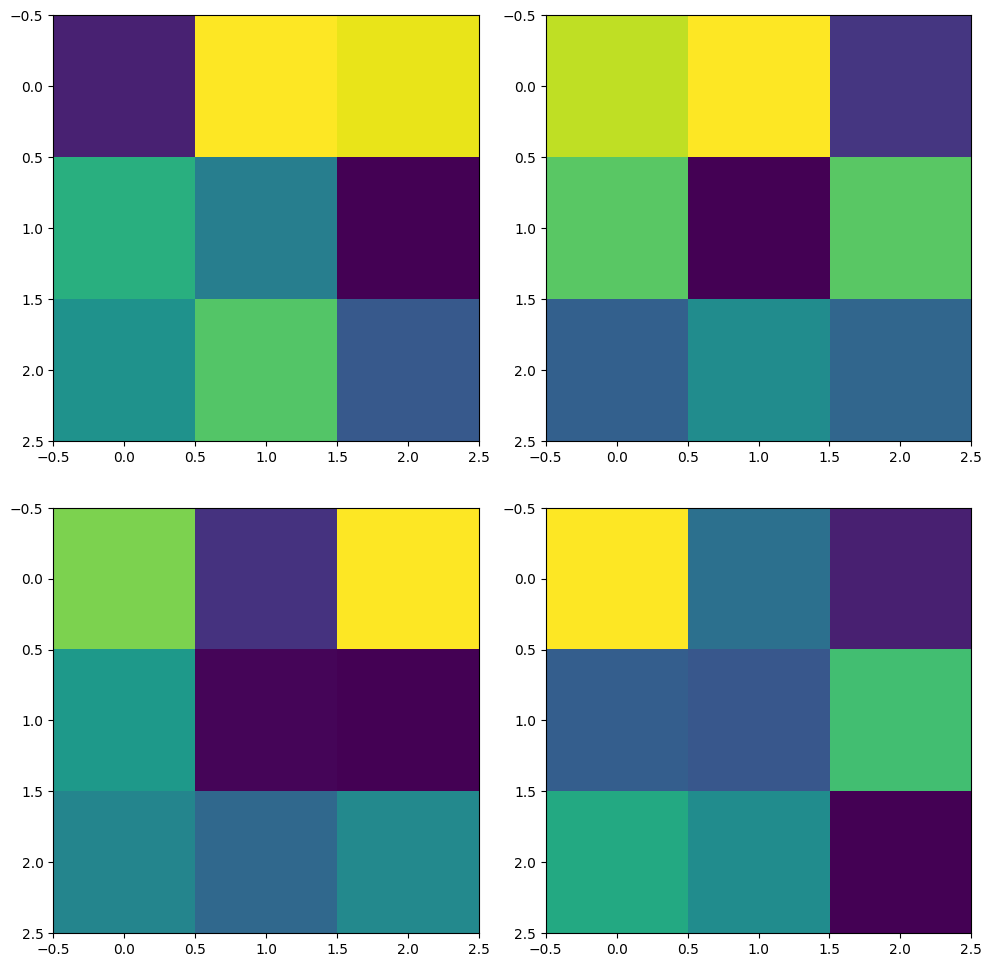

In [43]:
#MEDCNN plot
idx = 2
ch = 2
_ = a[idx]
grid = int(np.sqrt(next_perfect_square(_.shape[-1])))
plt.figure(figsize=(10,10))
for i in range(_.shape[-1]):
    plt.subplot(grid,grid,i+1)
    # plt.imshow(tf.abs(model.weights[0][:,:,0,i]))
    # plt.imshow(_[:,:,ch,i])#.astype(np.float32))
    plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(_[:,:,ch,i]))))#.astype(np.float32))
    # plt.imshow(np.angle(np.fft.fft2(_[:,:,1,i])))#.astype(np.float32))
plt.tight_layout()


grid = int(np.sqrt(next_perfect_square(_.shape[-1])))
plt.figure(figsize=(10,10))
for i in range(_.shape[-1]):
    plt.subplot(grid,grid,i+1)
    # plt.imshow(tf.abs(model.weights[0][:,:,0,i]))
    plt.imshow(_[:,:,ch,i])#.astype(np.float32))
    # plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(_[:,:,ch,i]))))#.astype(np.float32))
    # plt.imshow(np.angle(np.fft.fft2(_[:,:,1,i])))#.astype(np.float32))
plt.tight_layout()

    Segment and view the test slices

In [44]:
X_batch, Y_batch = test_iterator.__getitem__(0) 
X_batch.shape, Y_batch.shape

((20, 256, 256, 1), (20, 256, 256, 2))

In [45]:
yhat = model.predict(X_batch)

/data1/kishoretarafdar/miniforge3/envs/tf218/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step


(20, 256, 256, 1) (20, 256, 256)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
(20, 256, 256, 2) <<
(20, 256, 256) <<


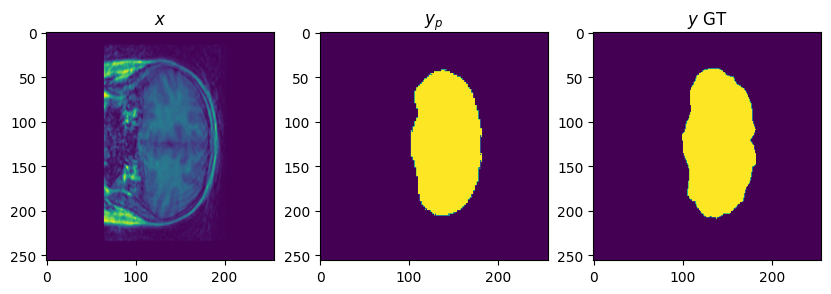

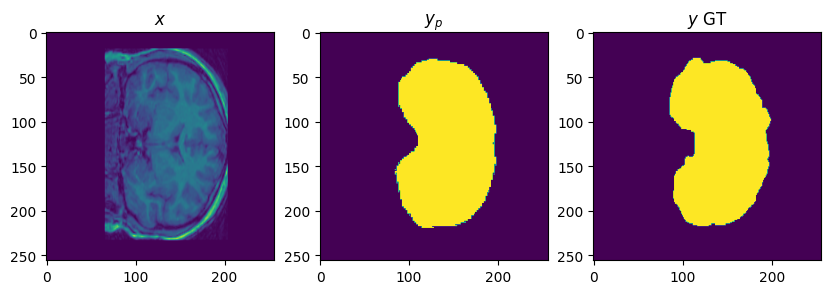

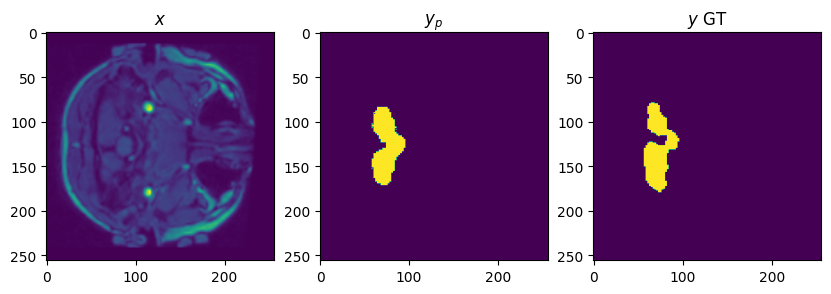

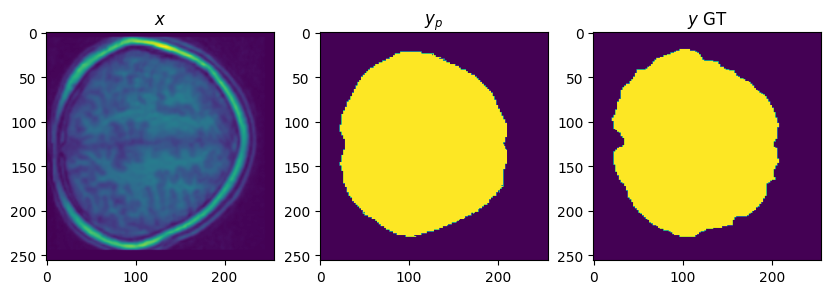

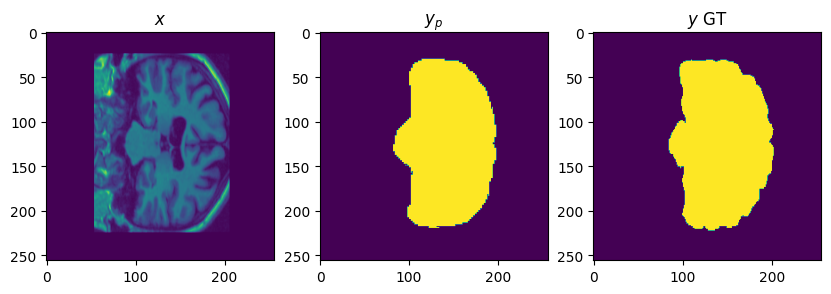

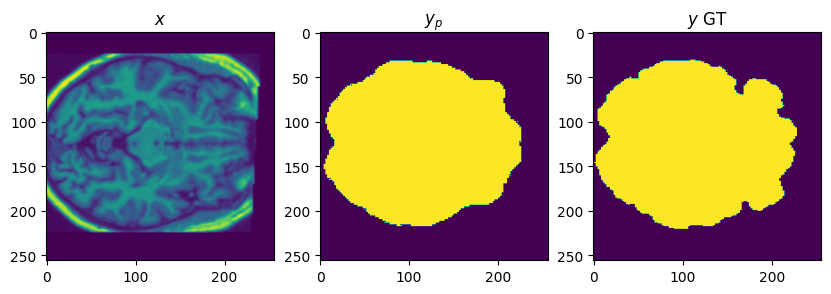

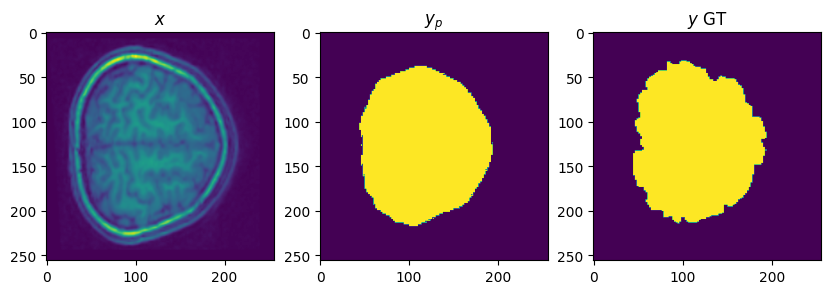

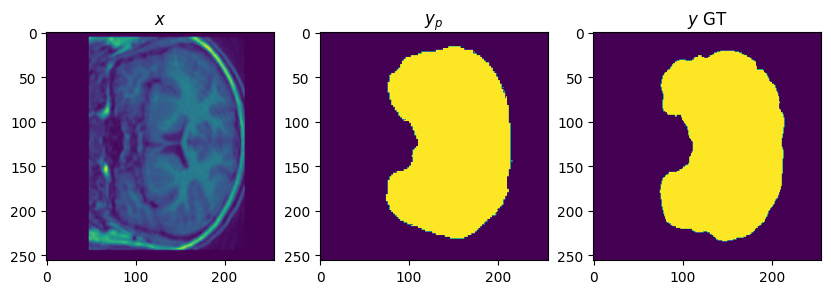

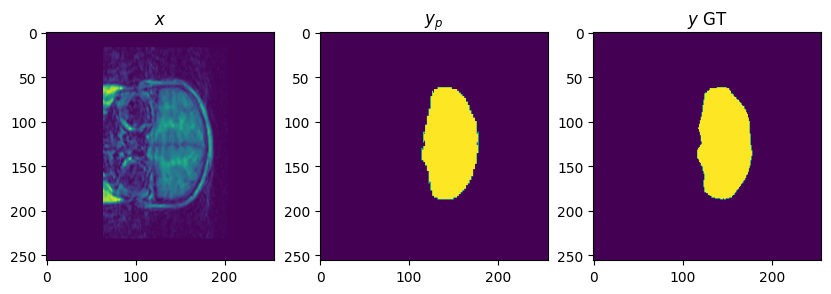

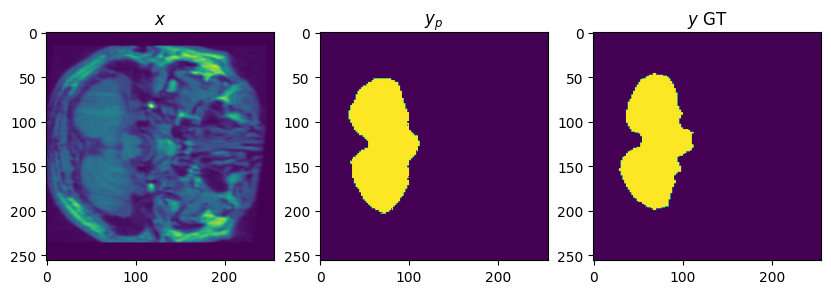

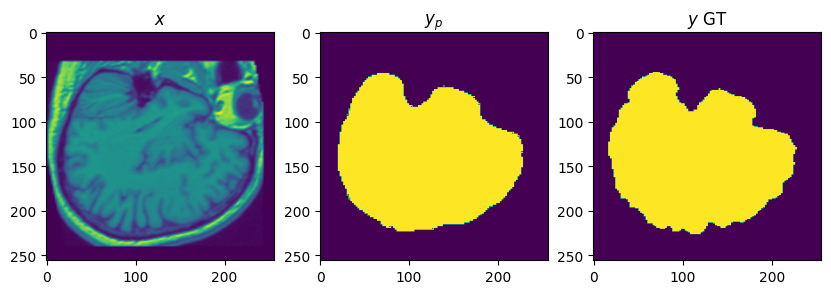

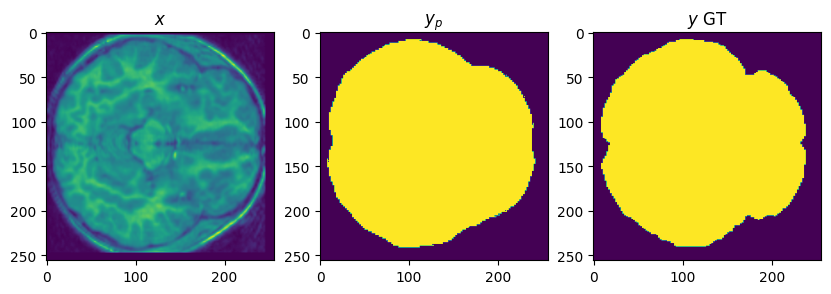

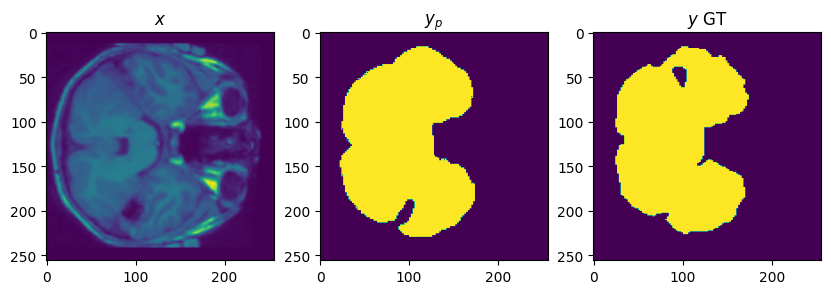

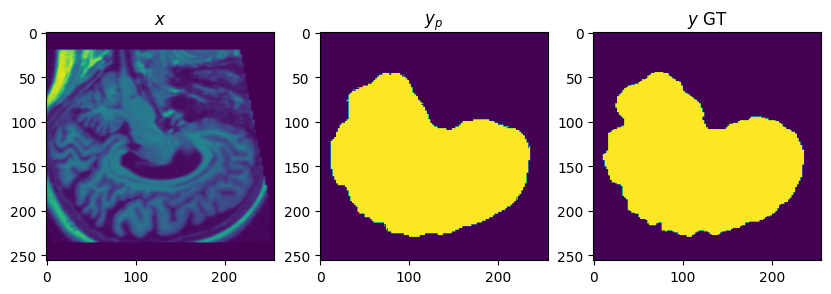

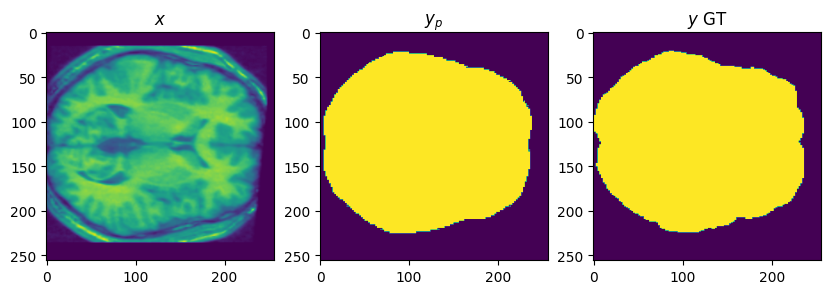

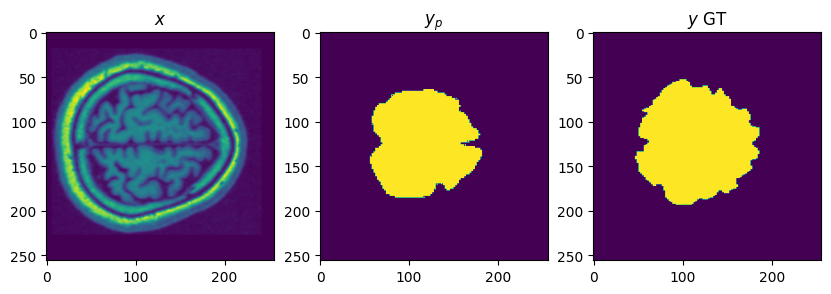

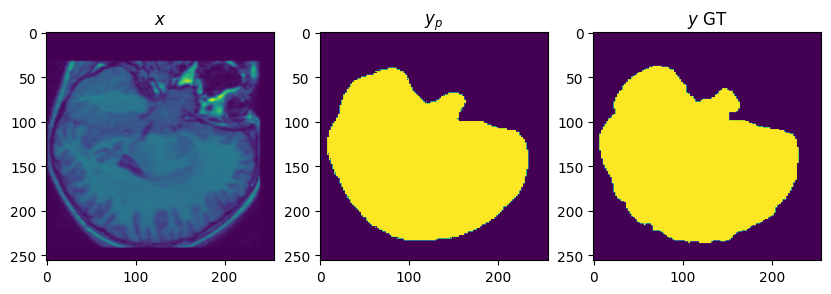

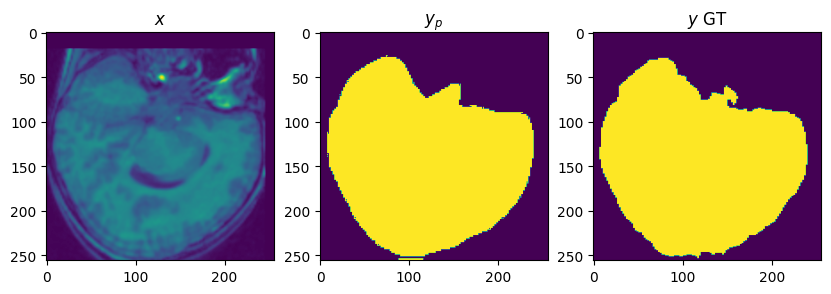

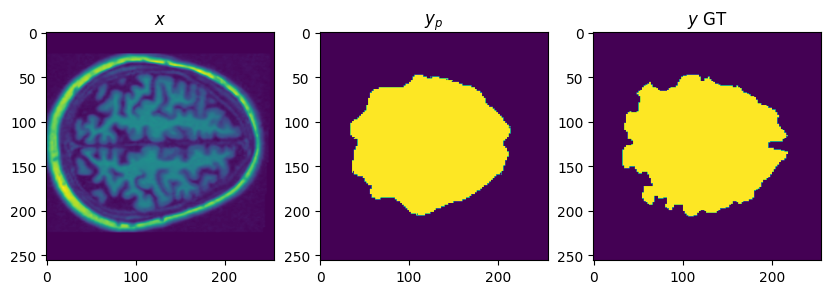

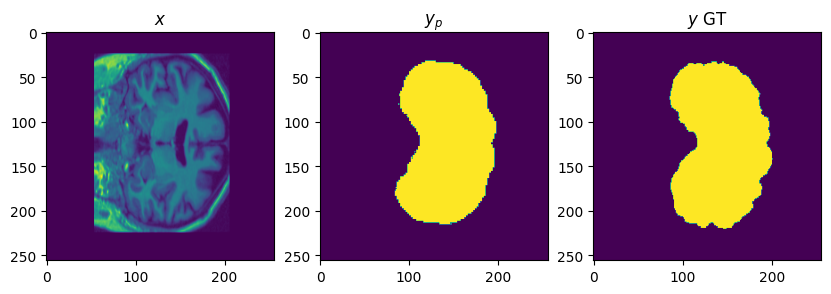

In [47]:
count=0
for batch in test_iterator:
    a, b = batch
    b = np.argmax(b, axis=-1)
    print(a.shape, b.shape)
    yhat = model.predict(a)
    print(yhat.shape,'<<')
    yhat = np.argmax(yhat, axis=-1)
    print(yhat.shape,'<<')


    for k in range(a.shape[0]):
        plt.figure(figsize=(10,3))
        plt.subplot(131), plt.imshow(a[k,:,:,:]), plt.title('$x$')
        plt.subplot(132), plt.imshow(yhat[k,:,:,]), plt.title('$y_p$')
        plt.subplot(133), plt.imshow(b[k,:,:]), plt.title('$y$ GT')
        plt.show()

    count+=1
    if count == 1:
        break